In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np
from math import exp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('gbm-data.csv')
df1 = df.to_numpy()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df1[:,1:1777], df1[:,0], test_size = 0.8, random_state = 241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           12.97s
         2           0.9192           10.97s
         3           0.8272           10.30s
         4           0.7834           10.18s
         5           0.7109            9.90s
         6           0.6368           10.30s
         7           0.5797           10.27s
         8           0.5610           10.31s
         9           0.5185           10.21s
        10           0.4984           10.25s
        20           0.1999            9.86s
        30           0.1313            9.43s
        40           0.0790            8.96s
        50           0.0511            8.46s
        60           0.0352            8.12s
        70           0.0245            7.68s
        80           0.0162            7.27s
        90           0.0114            6.83s
       100           0.0077            6.60s
       200           0.0002            2.39s


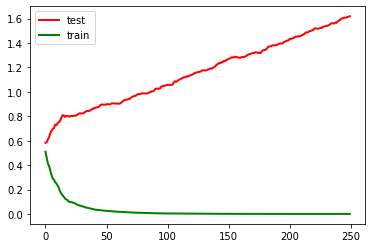

      Iter       Train Loss   Remaining Time 
         1           1.1255           16.31s
         2           1.0035           14.83s
         3           0.9386           13.57s
         4           0.8844           13.41s
         5           0.8381           13.73s
         6           0.7995           13.47s
         7           0.7559           13.12s
         8           0.7205           12.90s
         9           0.6958           13.15s
        10           0.6725           12.97s
        20           0.4672           11.73s
        30           0.3179           10.99s
        40           0.2274           10.43s
        50           0.1774            9.93s
        60           0.1394            9.39s
        70           0.1050            8.87s
        80           0.0805            8.35s
        90           0.0650            7.85s
       100           0.0511            7.34s
       200           0.0058            2.51s


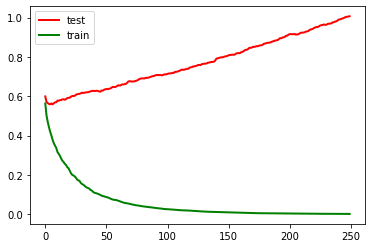

      Iter       Train Loss   Remaining Time 
         1           1.2095           13.55s
         2           1.1006           12.98s
         3           1.0240           12.44s
         4           0.9729           12.14s
         5           0.9387           12.48s
         6           0.8948           12.30s
         7           0.8621           12.14s
         8           0.8360           12.01s
         9           0.8171           11.91s
        10           0.7883           11.90s
        20           0.6029           11.28s
        30           0.4760           10.73s
        40           0.3879           10.15s
        50           0.3325           10.23s
        60           0.2759            9.72s
        70           0.2304            9.41s
        80           0.1969            9.04s
        90           0.1718            8.43s
       100           0.1404            7.84s
       200           0.0358            2.66s


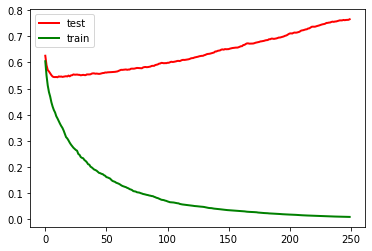

      Iter       Train Loss   Remaining Time 
         1           1.2613           13.86s
         2           1.1715           12.75s
         3           1.1009           12.35s
         4           1.0529           12.07s
         5           1.0130           12.12s
         6           0.9740           12.19s
         7           0.9475           12.07s
         8           0.9197           11.90s
         9           0.8979           11.84s
        10           0.8730           11.78s
        20           0.7207           11.32s
        30           0.6055           10.69s
        40           0.5244           10.82s
        50           0.4501           10.61s
        60           0.3908           10.19s
        70           0.3372            9.53s
        80           0.3009            9.07s
        90           0.2603            8.62s
       100           0.2327            8.10s
       200           0.0835            2.50s


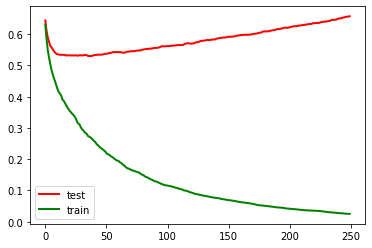

      Iter       Train Loss   Remaining Time 
         1           1.3199           11.94s
         2           1.2645           11.60s
         3           1.2170           11.54s
         4           1.1775           11.44s
         5           1.1404           11.40s
         6           1.1106           11.36s
         7           1.0844           11.37s
         8           1.0617           11.42s
         9           1.0411           11.42s
        10           1.0223           11.41s
        20           0.8864           10.80s
        30           0.7844           10.23s
        40           0.7176            9.73s
        50           0.6590            9.20s
        60           0.6120            8.70s
        70           0.5599            8.21s
        80           0.5242            7.73s
        90           0.4829            7.26s
       100           0.4473            6.79s
       200           0.2379            2.26s


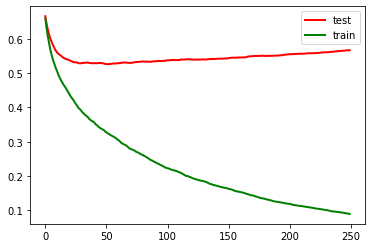

In [13]:
rates = [1., 0.5, 0.3, 0.2, 0.1]
for lr in rates:
    test_loss = []
    train_loss = []
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lr)
    clf.fit(X_train, y_train)
    for i, y_pred_test in enumerate(clf.staged_decision_function(X_test)):
        y_pred_test = 1 / (1 + np.exp(-y_pred_test))
        test_loss.append(log_loss(y_test, y_pred_test))
    for i, y_pred_train in enumerate(clf.staged_decision_function(X_train)):
        y_pred_train = 1 / (1 + np.exp(-y_pred_train))
        train_loss.append(log_loss(y_train, y_pred_train))
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

      Iter       Train Loss   Remaining Time 
         1           1.2613           13.86s
         2           1.1715           11.32s
         3           1.1009           10.37s
         4           1.0529            9.89s
         5           1.0130            9.61s
         6           0.9740            9.71s
         7           0.9475            9.82s
         8           0.9197            9.70s
         9           0.8979            9.60s
        10           0.8730            9.51s
        20           0.7207           10.20s
        30           0.6055            9.97s
        40           0.5244            9.50s
        50           0.4501            8.81s
        60           0.3908            8.26s
        70           0.3372            7.76s
        80           0.3009            7.54s
        90           0.2603            7.05s
       100           0.2327            6.57s
       200           0.0835            2.13s


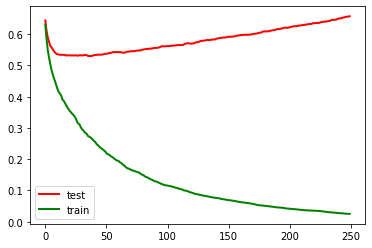

0.5301645204906471 36


In [18]:
test_loss = []
train_loss = []
clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=0.2)
clf.fit(X_train, y_train)
for i, y_pred_test in enumerate(clf.staged_decision_function(X_test)):
    y_pred_test = 1 / (1 + np.exp(-y_pred_test))
    test_loss.append(log_loss(y_test, y_pred_test))
for i, y_pred_train in enumerate(clf.staged_decision_function(X_train)):
    y_pred_train = 1 / (1 + np.exp(-y_pred_train))
    train_loss.append(log_loss(y_train, y_pred_train))
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])
plt.show()
print(min(test_loss), test_loss.index(min(test_loss)))

In [20]:
with open('2.2.txt', 'w') as f:
    f.write(str(min(test_loss)) + ' ' + str(test_loss.index(min(test_loss)) + 1))

In [23]:
clf1 = GradientBoostingClassifier(n_estimators=37, verbose=True, random_state=241, learning_rate=0.2)
clf1.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613            1.89s
         2           1.1715            1.76s
         3           1.1009            1.53s
         4           1.0529            1.41s
         5           1.0130            1.32s
         6           0.9740            1.31s
         7           0.9475            1.25s
         8           0.9197            1.23s
         9           0.8979            1.18s
        10           0.8730            1.13s
        20           0.7207            0.74s
        30           0.6055            0.32s


GradientBoostingClassifier(learning_rate=0.2, n_estimators=37, random_state=241,
                           verbose=True)

In [31]:
y_pred = clf1.predict_proba(X_test)
with open('2.3.txt', 'w') as f:
    f.write(str(log_loss(y_test, y_pred)))